# Visualizations

## Exploratory Data Analysis

In [1]:
import pandas as pd               #Used for data manipulation, tidying data and conditional statements
import bokeh.io                   #bokeh is the main plotting package (submodules of bokeh must be explicitly imported)
import bokeh.models               #bokeh.models helps turn dataframes and dictionaries into easily transformable data
import bokeh.plotting             #this is the primary tool used to assemble plots
import bokeh.transform            #function for computations such as a cumulative sum function
bokeh.io.output_notebook()        #Enable viewing Bokeh plots in the notebook and interactive
import matplotlib.pyplot as plt   #Data visualization dictionary
import numpy as np  

Loading BokehJS ...

Since our focus is on how campaigns affected sales the following data frames were imported into Python:

In [2]:
from completejourney_py import get_data

cj_data = get_data()
transactions = cj_data['transactions']
demographics = cj_data['demographics']
products = cj_data['products']
campaigns = cj_data['campaigns']

Once the completejourney data was imported into Python, the next step was to tidy the data. We were interested in discovering trends related to campaigns and how it affected sales. Therefore, we started with merging campaigns, demographics, transactions and products. 

In [3]:
campaigns.columns.intersection(transactions.columns) #Checks which columns have the same heading in both datasets

Index(['household_id'], dtype='object')

In [4]:
df1= (
    campaigns
    .merge(demographics, how='inner', on='household_id')
    .merge(transactions, how='inner', on='household_id')
)
df2= (
   df1
   .merge(products, how='inner', on='product_id')
)
coupons= (
    cj_data['coupon_redemptions']
    .merge(cj_data['demographics'], how='inner', on='household_id')
    .merge(cj_data['campaign_descriptions'], how='inner', on='campaign_id')
)
coupon_transactions = (
    cj_data['coupon_redemptions']
    .merge(cj_data['coupons'], how='inner', on='campaign_id')
)
test =(
    cj_data['campaign_descriptions']
    .merge(cj_data['coupon_redemptions'], how='inner', on='campaign_id')
)

In [5]:
datetimes = pd.to_datetime(coupon_transactions['redemption_date'])
coupon_transactions['day'] = datetimes.dt.day
coupon_transactions['month'] = datetimes.dt.month
coupon_transactions['year'] = datetimes.dt.year

coupon_redemptions = (
coupon_transactions
    .groupby('month')['redemption_date'].count()
)
coupon_redemptions = coupon_redemptions.to_frame()

In [6]:
coupon_transactions.loc[coupon_transactions['campaign_id'] == 18]

,household_id,coupon_upc_x,campaign_id,redemption_date,coupon_upc_y,product_id,day,month,year
31668825,1453,10000085475,18,2017-10-31,10000085475,1000205,31,10,2017
31668826,1453,10000085475,18,2017-10-31,10000085475,1000237,31,10,2017
31668827,1453,10000085475,18,2017-10-31,10000085475,1000285,31,10,2017
31668828,1453,10000085475,18,2017-10-31,10000085475,1000411,31,10,2017
31668829,1453,10000085475,18,2017-10-31,10000085475,1000830,31,10,2017
...,...,...,...,...,...,...,...,...,...
56214437,2317,10000089277,18,2017-12-24,59986600074,10456329,24,12,2017
56214438,2317,10000089277,18,2017-12-24,59986600074,10457608,24,12,2017
56214439,2317,10000089277,18,2017-12-24,59986600074,12385921,24,12,2017
56214440,2317,10000089277,18,2017-12-24,59986600074,6961675,24,12,2017


In [7]:
campaign13_transactions = (
    coupon_transactions
    .query('campaign_id==18')
)
campaign13_redemptions = (
campaign13_transactions
    .groupby('month')['redemption_date'].count()
)
campaign13_redemptions = campaign13_redemptions.to_frame()
campaign13_redemptions

,redemption_date
month,
10,112767
11,17554063
12,6878787


In [8]:
top_campaign_transactions = (
    coupon_transactions
    .query('campaign_id==18' or 'campaign_id==13' or 'campaign_id==8')
)
top_campaign_redemptions = (
top_campaign_transactions
    .groupby('month')['redemption_date'].count()
)
top_campaign_redemptions = top_campaign_redemptions.to_frame()

### Which campaigns sold the most products?

The first step we took to evaluate the effectiveness of campaigns was to find out the total sales achieved through each campaign.

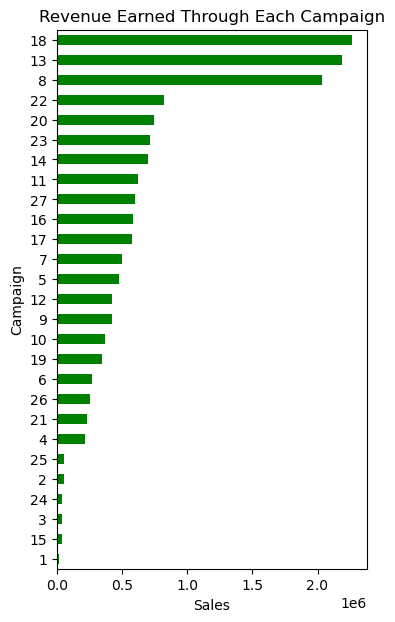

In [9]:
df_campaigns = df2.groupby(['campaign_id'],as_index=False).agg({'sales_value':'sum'}).sort_values(by = 'sales_value', ascending=False)

ax =(df_campaigns
    .sort_values('sales_value')
    .plot(x='campaign_id', y='sales_value', kind='barh', title='Revenue Earned Through Each Campaign', figsize=(4,7),color='green', legend = False, xlabel='Campaign')
);
ax.set_xlabel('Sales');

Looking at the bar chart above it is clear that campaigns 18, 13 and 8 generated the highest sales. Let's take a deeper dive into these three campaigns.

### Which departments were affected by campaigns 18, 13 & 8?

In this section we determined the departments that brought in the most revenue within these the top 3 campaigns.

In [10]:
df_campaigns_18 = df2.loc[(df2['campaign_id']==18)] 
df_department_18 = df_campaigns_18.groupby(['department'],as_index=False).agg({'sales_value':'sum'}).sort_values(by = 'sales_value', ascending=True)
df_department_18 = df_department_18[~df_department_18['department'].isin(['MISCELLANEOUS', 'COUPON'])]

In [11]:
df_campaigns_13 = df2.loc[(df2['campaign_id']==13)] 
df_department_13 = df_campaigns_13.groupby(['department'],as_index=False).agg({'sales_value':'sum'}).sort_values(by = 'sales_value', ascending=True)
df_department_13 = df_department_13[~df_department_13['department'].isin(['MISCELLANEOUS', 'COUPON'])]

In [12]:
df_campaigns_8 = df2.loc[(df2['campaign_id']==8)] 
df_department_8 = df_campaigns_8.groupby(['department'],as_index=False).agg({'sales_value':'sum'}).sort_values(by = 'sales_value', ascending=True)
df_department_8 = df_department_8[~df_department_8['department'].isin(['MISCELLANEOUS', 'COUPON'])]
df_department_8['sales_value'].mean()

77045.46692307692

In [13]:
df_campaigns_18 = df2.loc[(df2['campaign_id']==18)] 
df_campaigns_13 = df2.loc[(df2['campaign_id']==13)] 
df_campaigns_8 = df2.loc[(df2['campaign_id']==8)] 

df_department_18 = df_campaigns_18.groupby(['department'],as_index=False).agg({'sales_value':'sum'}).nlargest(15, 'sales_value').sort_values(by = 'sales_value', ascending=True)
df_department_18 = df_department_18[~df_department_18['department'].isin(['MISCELLANEOUS', 'COUPON'])]

df_department_13 = df_campaigns_13.groupby(['department'],as_index=False).agg({'sales_value':'sum'}).nlargest(15, 'sales_value').sort_values(by = 'sales_value', ascending=True)
df_department_13 = df_department_13[~df_department_13['department'].isin(['MISCELLANEOUS', 'COUPON'])]

df_department_8 = df_campaigns_8.groupby(['department'],as_index=False).agg({'sales_value':'sum'}).nlargest(15, 'sales_value').sort_values(by = 'sales_value', ascending=True)
df_department_8 = df_department_8[~df_department_8['department'].isin(['MISCELLANEOUS', 'COUPON'])]

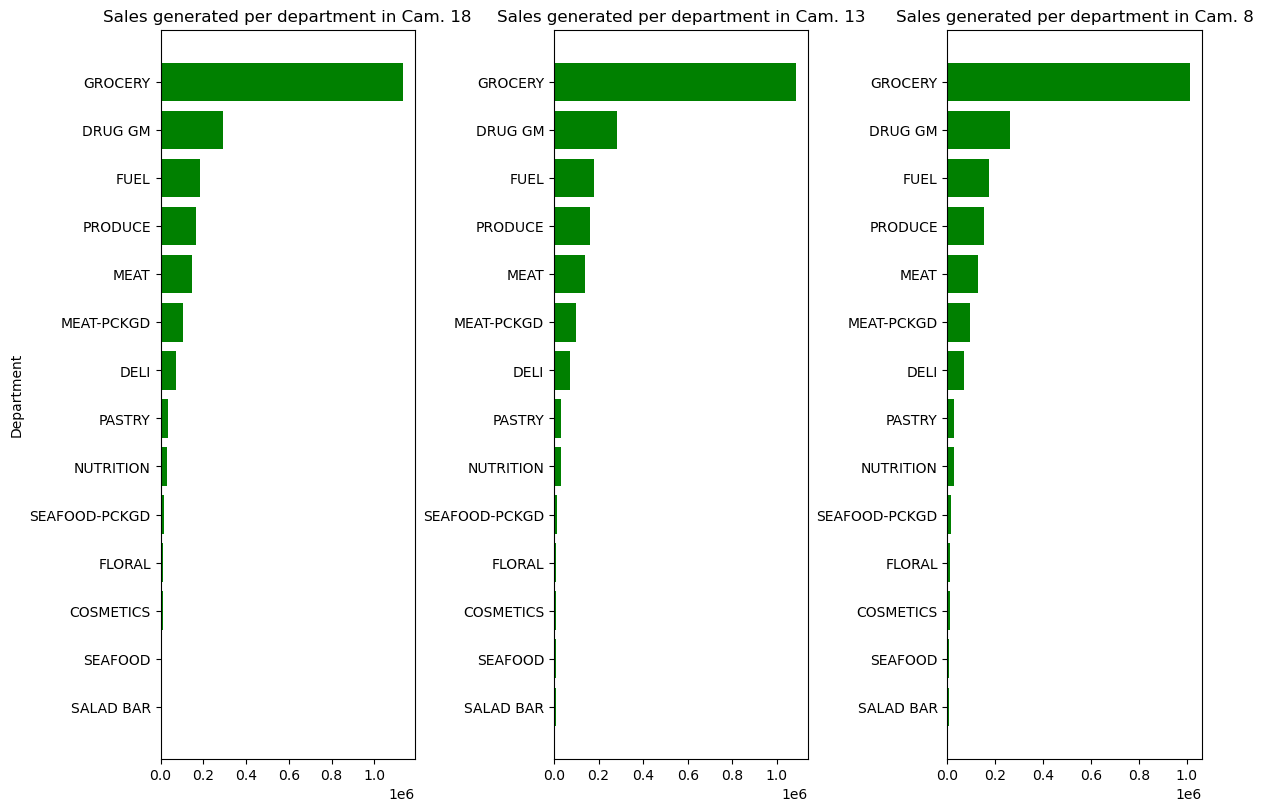

In [14]:
fig, ax_array = plt.subplots(1, 3, figsize=(12, 8), constrained_layout=True)
ax1 = ax_array[0]  
ax2 = ax_array[1]  
ax3 = ax_array[2]  
# plot 1
ax1.barh('department','sales_value', data=df_department_18, color = 'green')
ax1.set_ylabel('Department')
ax1.set_title('Sales generated per department in Cam. 18')
# plot 2
ax2.barh('department','sales_value', data=df_department_13, color = 'green')
ax2.set_title('Sales generated per department in Cam. 13')
# plot 3
ax3.barh('department','sales_value', data=df_department_8, color = 'green')
ax3.set_title('Sales generated per department in Cam. 8');

It looks like certain departments such as Grocery and Drug GM generated the most revenue while departments such as whole sales and Postal Center did not generate any revenue at all. Looking at the above graphs Regork will benefit from introducing campaigns focusing more on departments Deli through Grocery and eliminate campaigns for some of the low yielding departments.

### Coupon Redemptions by Age Group

Now that we can see which campaigns are most effective, we can look at what customers are most valuable to target these campaigns towards.

In [15]:
%load_ext watermark
%watermark -v -p jupyterlab

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 7.31.1

jupyterlab: 3.4.4

